# Big Mart Sales Prediction

##### Reading and Understanding the Data

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
df = pd.read_csv('train.csv')

In [4]:
# Checking the head of the dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Checking the Shape of Dataset
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Cleaning the Dataset

In [7]:
# Since there are null values present in `Item_Weight` and `Outlet_Size` and so imputing missing values for Item_Weight with the mean

mean_item_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_item_weight, inplace=True)

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
# Imputing the missing values for Outlet_Size with the mode

mode_outlet_size = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(mode_outlet_size, inplace=True)

In [10]:
# Checking for the remaining null values if any in df
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
# checking the values for `Item_Fat_Content`  
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

#### Since there are only values as `Low Fat`, `Regular`, `LF`, `reg`, `low fat` but actual values are `Low Fat` and  `Regular` only

In [13]:
fat_content_original = df['Item_Fat_Content'].value_counts()

In [14]:
# Standardizing the values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
fat_content_cleaned = df['Item_Fat_Content'].value_counts()

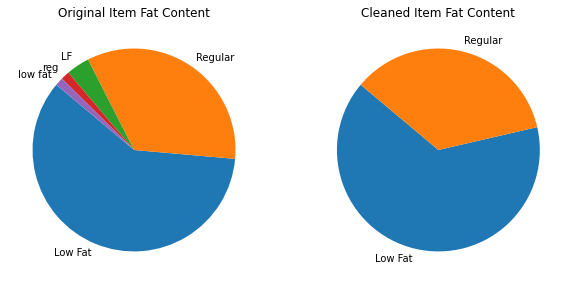

In [16]:
# PLotting a Pie Chart to visualize the work
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.pie(fat_content_original, labels=fat_content_original.index, startangle=140)
plt.title('Original Item Fat Content')
plt.subplot(1, 2, 2)
plt.pie(fat_content_cleaned, labels=fat_content_cleaned.index,  startangle=140)
plt.title('Cleaned Item Fat Content')

plt.show()

In [17]:
# creating a dummy variable for `Item_Fat_Content`
fat = pd.get_dummies(df['Item_Fat_Content'], drop_first= True)
df = pd.concat([df,fat],axis=1)

In [18]:
df.drop(['Item_Fat_Content'], axis=1, inplace =True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Regular
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,1
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0


In [19]:
# checking values for `Outlet_Size`
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

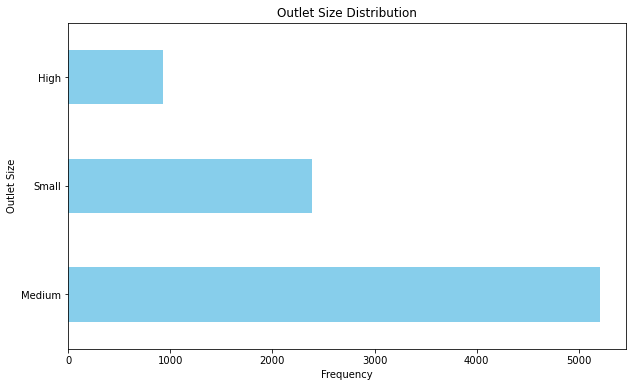

In [20]:
outlet_size = df['Outlet_Size'].value_counts()
# Plotting bar chart for Outlet Size data
plt.figure(figsize=(10, 6))
outlet_size.plot(kind='barh', color='skyblue')
plt.title('Outlet Size Distribution')
plt.xlabel('Frequency')
plt.ylabel('Outlet Size')
plt.show()

#### `Medium` sized Outlets are the most abundant

In [21]:
# creating a dummy variable for `Outlet_Size`
size = pd.get_dummies(df['Outlet_Size'], drop_first= True)
df = pd.concat([df,size],axis=1)
df.drop(['Outlet_Size'], axis=1, inplace =True)

In [22]:
# checking values for `Outlet_Location_Type`
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [23]:
# creating a dummy variable for `Outlet_Location_Type`
location = pd.get_dummies(df['Outlet_Location_Type'], drop_first= True)
df = pd.concat([df,location],axis=1)
df.drop(['Outlet_Location_Type'], axis=1, inplace =True)

In [24]:
# checking values for `Outlet_Type`
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

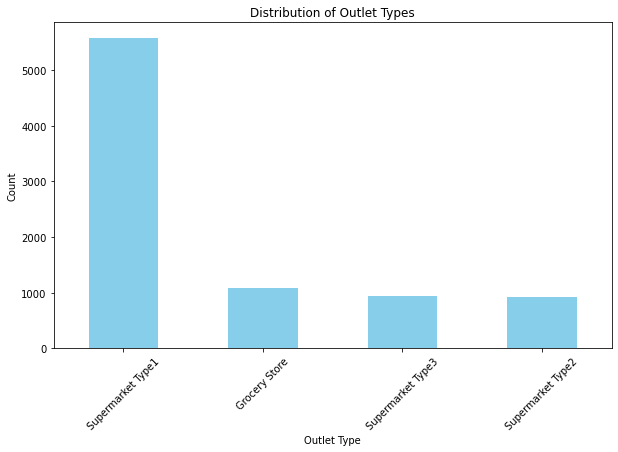

In [25]:
outlet_types = df['Outlet_Type'].value_counts()
# Plotting bar plot for outlet types
plt.figure(figsize=(10, 6))
outlet_types.plot(kind='bar', color='skyblue')
plt.title('Distribution of Outlet Types')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### `Supermarket Type1` has a mojority in `outlet_type`

In [26]:
# creating a dummy variable for `Outlet_Type`
type = pd.get_dummies(df['Outlet_Type'], drop_first= True)
df = pd.concat([df,type],axis=1)
df.drop(['Outlet_Type'], axis=1, inplace =True)

In [27]:
# checking values for `Item_Type`
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

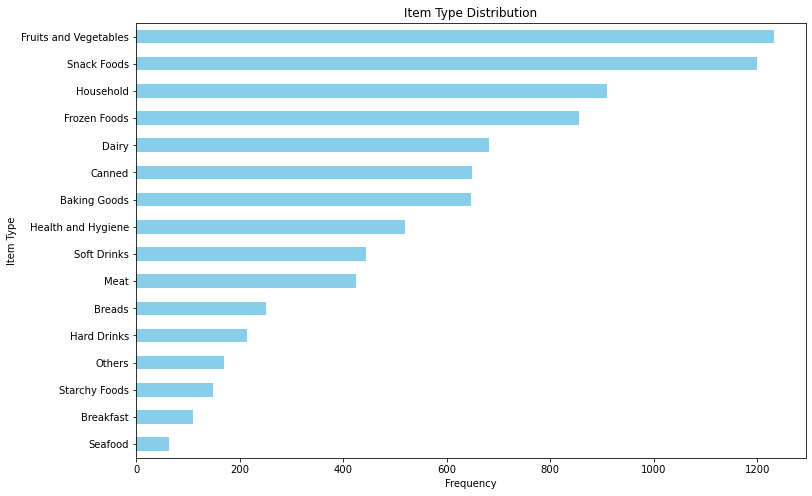

In [28]:
item_type = df['Item_Type'].value_counts()
# Plotting bar chart for Item Type data
plt.figure(figsize=(12, 8))
item_type.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Item Type Distribution')
plt.xlabel('Frequency')
plt.ylabel('Item Type')
plt.show()

##### Since there are 16 values for `Item_type` but we can group them into `Food` ,`Non-Consumable` and `Drinks`. 

In [29]:
# Combining all columns into `Food` ,`Non-Consumable` and `Drinks`. 
df['Item_Identifier'].value_counts()
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                         'NC':'Non-Consumable',
                                                         'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

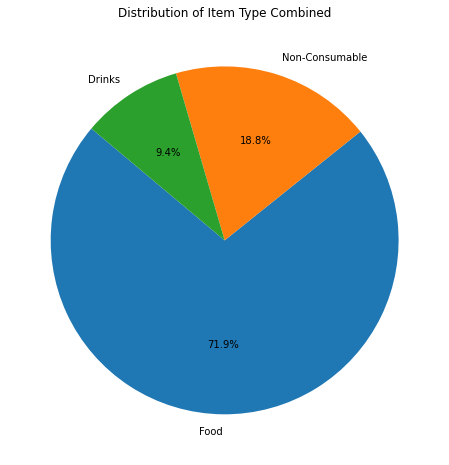

In [30]:
item_type_combined = df['Item_Type_Combined'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))

plt.pie(item_type_combined, labels=item_type_combined.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Item Type Combined')

plt.show()

#### `Food` has the greatest share in `Item_type'


In [31]:
# creating a dummy variable for `Item_Type`
Itype = pd.get_dummies(df['Item_Type_Combined'], drop_first= True)
df = pd.concat([df,Itype],axis=1)
df.drop(['Item_Type_Combined'], axis=1, inplace =True)

In [32]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [33]:
pd.set_option('display.max_columns', None)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Regular,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Non-Consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,0,1,0,0,0,1,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,1,1,0,0,1,0,1,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,0,1,0,0,0,1,0,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,1,1,0,0,1,0,0,0,1,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,0,0,0,0,1,1,0,0,0,1


In [34]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Regular                        uint8
Medium                         uint8
Small                          uint8
Tier 2                         uint8
Tier 3                         uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
Food                           uint8
Non-Consumable                 uint8
dtype: object

# Doing the same for test dataset 

In [35]:
# Reading the dataset (train)
df1 = pd.read_csv('test.csv')

In [36]:
# Checking the head of the dataset

df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [37]:
df1.shape

(5681, 11)

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


#### Cleaning the Data

In [39]:
# Since there are null values present in `Item_Weight` and `Outlet_Size` and so imputing missing values

# Impute missing values for Item_Weight with the mean
mean_item_weight = df1['Item_Weight'].mean()
df1['Item_Weight'].fillna(mean_item_weight, inplace=True)

In [40]:
# Impute missing values for Outlet_Size with the mode
mode_outlet_size = df1['Outlet_Size'].mode()[0]
df1['Outlet_Size'].fillna(mode_outlet_size, inplace=True)

In [41]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [42]:
df1['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

#### Since there are only values as `Low Fat`, `Regular`, `LF`, `reg`, `low fat` but actual values are `Low Fat` and  `Regular` only

In [43]:
fat_content_original = df1['Item_Fat_Content'].value_counts()

In [44]:
# Standardizing the values
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df1['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [45]:
fat_content_cleaned = df1['Item_Fat_Content'].value_counts()

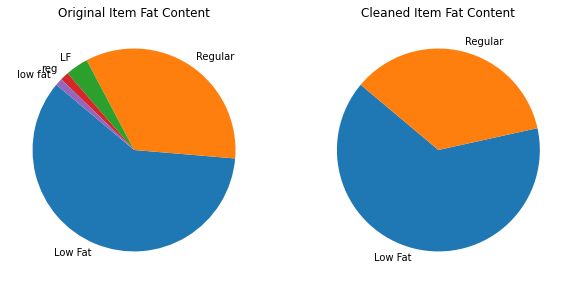

In [46]:
# Plotting pie chart for original data
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.pie(fat_content_original, labels=fat_content_original.index, startangle=140)
plt.title('Original Item Fat Content')

# Plotting pie chart for cleaned data
plt.subplot(1, 2, 2)
plt.pie(fat_content_cleaned, labels=fat_content_cleaned.index,  startangle=140)
plt.title('Cleaned Item Fat Content')

plt.show()

In [47]:
# creating a dummy variable for `Item_Fat_Content`
fat = pd.get_dummies(df1['Item_Fat_Content'], drop_first= True)
df1 = pd.concat([df1,fat],axis=1)

In [48]:
df1.drop(['Item_Fat_Content'], axis=1, inplace =True)
df1.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Regular
0,FDW58,20.750000,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,0
1,FDW14,8.300000,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,1
2,NCN55,14.600000,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,0
3,FDQ58,7.315000,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,0
4,FDY38,12.695633,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,1


In [49]:
# checking values for `Outlet_Size`
df1['Outlet_Size'].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

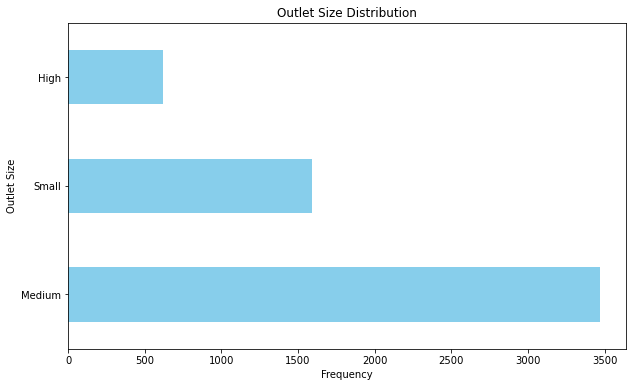

In [50]:
outlet_size = df1['Outlet_Size'].value_counts()
# Plotting bar chart for Outlet Size data
plt.figure(figsize=(10, 6))
outlet_size.plot(kind='barh', color='skyblue')
plt.title('Outlet Size Distribution')
plt.xlabel('Frequency')
plt.ylabel('Outlet Size')
plt.show()

#### `Medium` sized Outlets are the most abundant

In [51]:
# creating a dummy variable for `Outlet_Size`
size = pd.get_dummies(df1['Outlet_Size'], drop_first= True)
df1 = pd.concat([df1,size],axis=1)
df1.drop(['Outlet_Size'], axis=1, inplace =True)


In [52]:
# checking values for `Outlet_Location_Type`
df1['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [53]:
# creating a dummy variable for `Outlet_Location_Type`
location = pd.get_dummies(df1['Outlet_Location_Type'], drop_first= True)
df1 = pd.concat([df1,location],axis=1)
df1.drop(['Outlet_Location_Type'], axis=1, inplace =True)

In [54]:
# checking values for `Outlet_Type`
df1['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

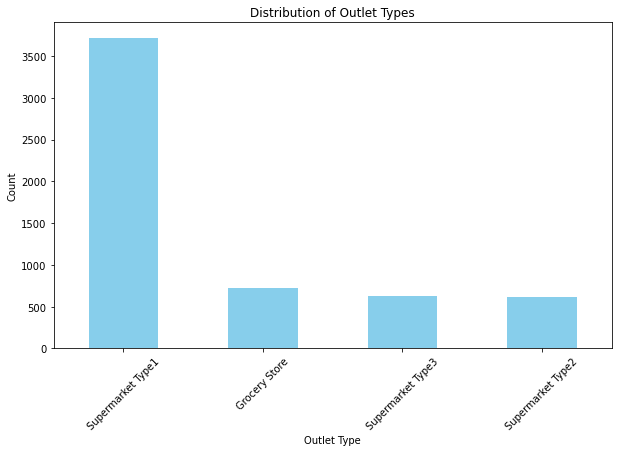

In [55]:
outlet_types = df1['Outlet_Type'].value_counts()
# Plotting bar plot for outlet types
plt.figure(figsize=(10, 6))
outlet_types.plot(kind='bar', color='skyblue')
plt.title('Distribution of Outlet Types')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### `Supermarket Type1` has a mojority in `outlet_type`

In [56]:
# creating a dummy variable for `Outlet_Type`
type = pd.get_dummies(df1['Outlet_Type'], drop_first= True)
df1 = pd.concat([df1,type],axis=1)
df1.drop(['Outlet_Type'], axis=1, inplace =True)

In [57]:
# checking values for `Item_Type`
df1['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

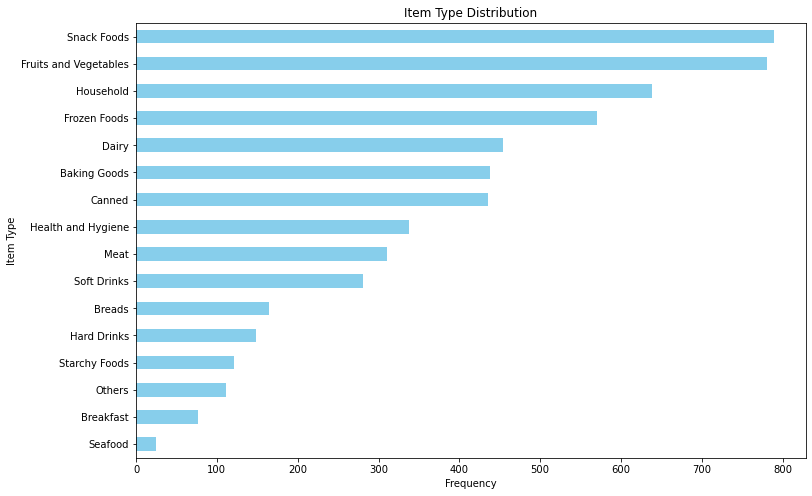

In [58]:
item_type = df1['Item_Type'].value_counts()
# Plotting bar chart for Item Type data
plt.figure(figsize=(12, 8))
item_type.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Item Type Distribution')
plt.xlabel('Frequency')
plt.ylabel('Item Type')
plt.show()

##### Since there are 16 values for `Item_type` but we can group them into `Food` ,`Non-Consumable` and `Drinks`. 

In [59]:
# Combining all columns into `Food` ,`Non-Consumable` and `Drinks`. 
df1['Item_Identifier'].value_counts()
df1['Item_Type_Combined'] = df1['Item_Identifier'].apply(lambda x: x[0:2])
df1['Item_Type_Combined'] = df1['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df1['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

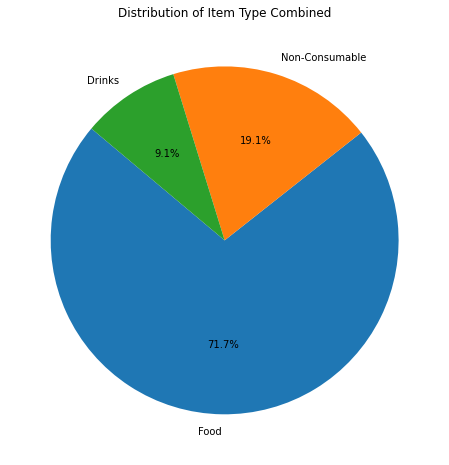

In [60]:
item_type_combined = df1['Item_Type_Combined'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))

plt.pie(item_type_combined, labels=item_type_combined.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Item Type Combined')

plt.show()

#### `Food` has the greatest share in `Item_type'


In [61]:
# creating a dummy variable for `Item_Type`
Itype = pd.get_dummies(df1['Item_Type_Combined'], drop_first= True)
df1 = pd.concat([df1,Itype],axis=1)
df1.drop(['Item_Type_Combined'], axis=1, inplace =True)

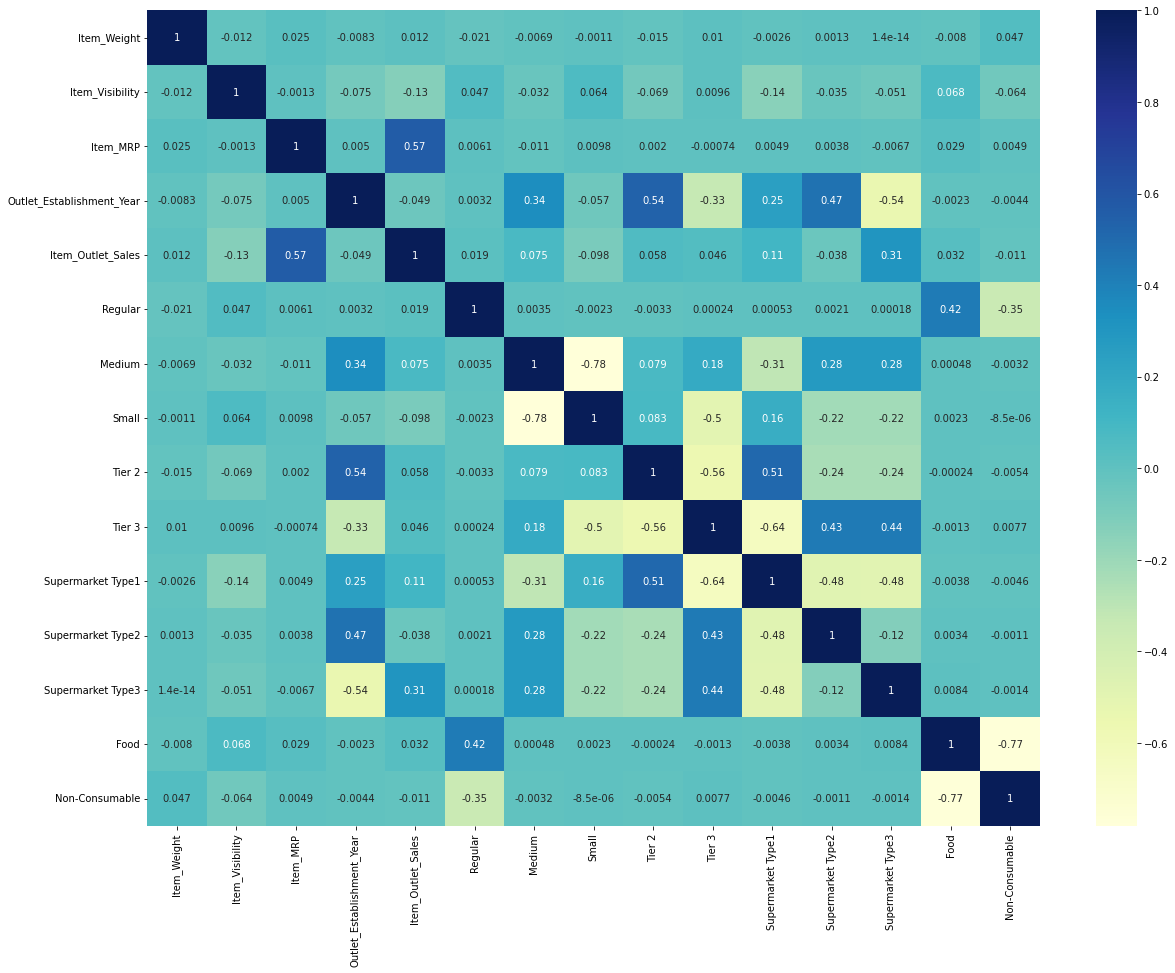

In [62]:
# Let's check the correlation coefficients to see which variables are highly correlated
import seaborn as sns
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Building the Model

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()

In [65]:
num_vars = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']

df[num_vars] = scaler.fit_transform(df[num_vars])
df1[num_vars] = scaler.transform(df1[num_vars])

In [66]:
 df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Regular,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Non-Consumable
0,FDA15,0.282525,0.048866,Dairy,0.927507,OUT049,0.583333,3735.1380,0,1,0,0,0,1,0,0,1,0
1,DRC01,0.081274,0.058705,Soft Drinks,0.072068,OUT018,1.000000,443.4228,1,1,0,0,1,0,1,0,0,0
2,FDN15,0.770765,0.051037,Meat,0.468288,OUT049,0.583333,2097.2700,0,1,0,0,0,1,0,0,1,0
3,FDX07,0.871986,0.000000,Fruits and Vegetables,0.640093,OUT010,0.541667,732.3800,1,1,0,0,1,0,0,0,1,0
4,NCD19,0.260494,0.000000,Household,0.095805,OUT013,0.083333,994.7052,0,0,0,0,1,1,0,0,0,1


In [67]:
df1.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Regular,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Non-Consumable
0,FDW58,0.964275,0.023036,Snack Foods,0.325012,OUT049,0.583333,0,1,0,0,0,1,0,0,1,0
1,FDW14,0.222983,0.117018,Dairy,0.237819,OUT017,0.916667,1,1,0,1,0,1,0,0,1,0
2,NCN55,0.598095,0.303221,Others,0.893316,OUT010,0.541667,0,1,0,0,1,0,0,0,0,1
3,FDQ58,0.164335,0.046860,Snack Foods,0.525233,OUT017,0.916667,0,1,0,1,0,1,0,0,1,0
4,FDY38,0.484706,0.361153,Dairy,0.861381,OUT027,0.000000,1,1,0,0,1,0,0,1,1,0


In [68]:
# df.describe()

In [69]:
# df1.describe()

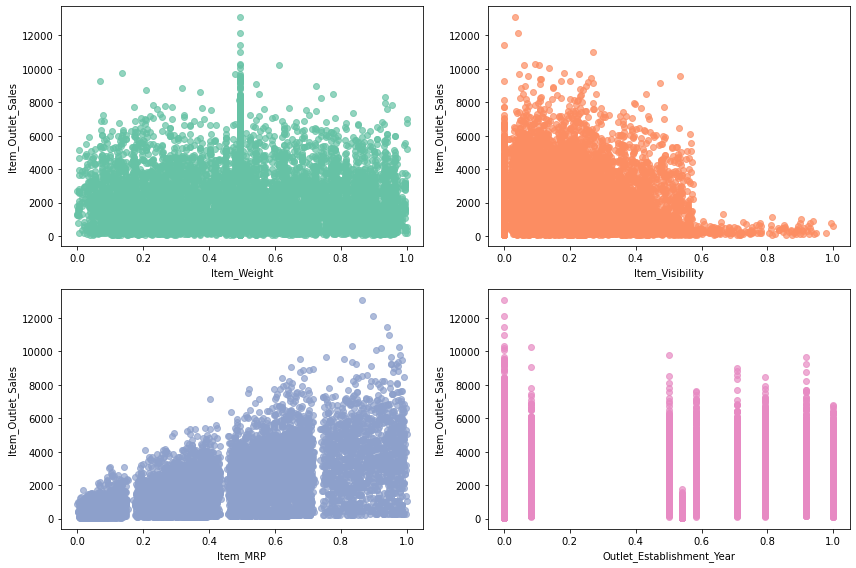

In [70]:
# Defining the features and the target variable
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
target_variable = 'Item_Outlet_Sales'

# Creating scatter plots for each feature vs. the target variable
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set2', len(features))

for i, (feature, color) in enumerate(zip(features, colors), 1):
  plt.subplot(2, 2, i)
  plt.scatter(df[feature], df[target_variable], color=color, alpha=0.7) 
  plt.xlabel(feature)
  plt.ylabel(target_variable)

plt.tight_layout()
plt.show()

OBSERVATIONS

* **Item Weight vs. Item Outlet Sales:**

  There appears to be a **weak positive correlation** between item weight and sales. This indicates that heavier items tend to have slightly higher sales compared to lighter items. However, the scattered nature of the data suggests that weight isn't a strong predictor of sales on its own.

* **Item Visibility vs. Item Outlet Sales:**

  A clearer **positive correlation** is evident between item visibility and sales. This implies that items allocated a larger display area in the store (higher visibility) tend to have higher sales compared to less visible items. The data for this plot is more clustered compared to the weight vs sales plot, signifying a potentially stronger relationship.

* **Item MRP vs. Item Outlet Sales:**

  Discerning the relationship between MRP and sales from this graph is quite challenging. There might be a **weak positive correlation**, but the data's scattered nature and presence of outliers make it difficult to confirm.

* **Outlet Establishment Year vs. Item Outlet Sales:**

  It's inconclusive from this graph whether a relationship exists between the year a store was established and the sales of a particular item. The data points form a cloud with no apparent pattern.

#### Splitting the data

In [71]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y) for training dataset
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier'])
y = df['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LINEAR MODEL

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = regressor.predict(X_test)

In [74]:
y_pred

array([1376.0984455 ,  741.34111398,  800.15859582, ...,  828.79898246,
        571.73768162, 1734.23346154])

In [75]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

In [76]:
y_pred_test = regressor.predict(X_test)

In [77]:
r2_val = r2_score(y_test, y_pred_test)
print("R-squared : ", r2_val)

R-squared :  0.5811308737546637


In [78]:
mse_val = mean_squared_error(y_test, y_pred_test)
print("Mean squared error :", mse_val)

Mean squared error : 1138473.7469647252


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

In [80]:
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [81]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='neg_mean_squared_error')

In [82]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [83]:
best_estimator = grid_search.best_estimator_

In [84]:
y_pred = best_estimator.predict(X_test)

In [85]:
cv_scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [-1270529.43933264 -1274651.7846786  -1347717.02098098 -1319962.70880865
 -1350536.48836823]
Mean cross-validation score: -1312679.4884338207


In [86]:
mean_mse_cv = -cv_scores.mean()
print("Mean cross-validation mean squared error:", mean_mse_cv)


Mean cross-validation mean squared error: 1312679.4884338207


In [87]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1143


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_estimator = grid_search.best_estimator_
y_pred_train = best_estimator.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean squared error on training data:", mse_train)
final_model = LinearRegression(**best_params)
final_model.fit(X_train, y_train)


Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Mean squared error on training data: 1305861.9445945725


LinearRegression(normalize=True)

In [89]:
# Evaluating the final model on test data
r2_val_final = final_model.score(X_test, y_test)
print("R-squared for final model:", r2_val_final)

y_pred_final = final_model.predict(X_test)
mse_val_final = mean_squared_error(y_test, y_pred_final)
print("Mean Squared Error for final model:", mse_val_final)

R-squared for final model: 0.5811308737546635
Mean Squared Error for final model: 1138473.7469647254


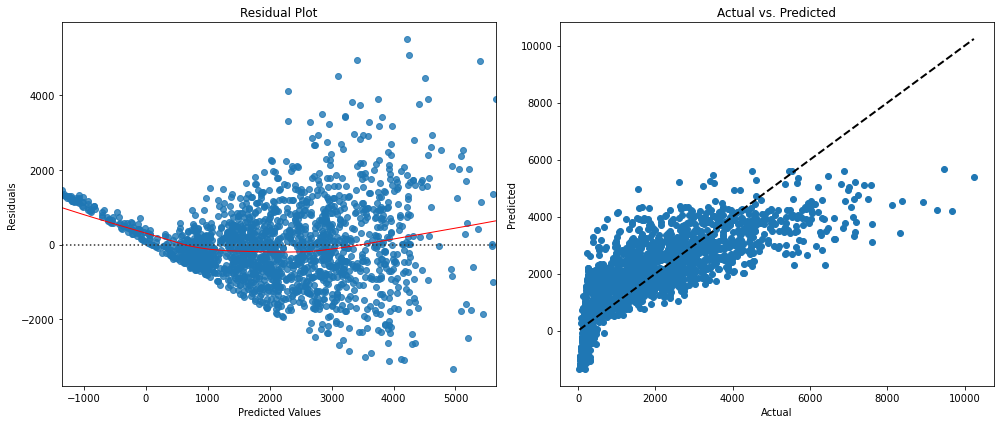

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual Plot
residuals = y_test - y_pred_final
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.residplot(y_pred_final, residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Actual vs. Predicted Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_final)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

plt.tight_layout() 
plt.show()

## Model Evaluation: Residuals and Predictions

### Residual Plot

The residuals, scattered around the horizontal zero line, indicate **no consistent pattern of overprediction or underprediction** across the predicted value range. This is a positive sign! The spread of residuals also appears **relatively constant**, suggesting **consistent model variance**. However, with limited data points, a definitive conclusion might be challenging.

### Actual vs. Predicted Plot

The data points generally follow a **diagonal trend**, signifying a **positive correlation** between actual and predicted values. This implies the model captures the **overall direction** of the relationship between features and the target variable.

There's some scatter around the diagonal, indicating the model's predictions aren't perfectly accurate for every data point (common in regression models). A few points deviate significantly, potentially representing **outliers** or observations where predictions are significantly off. Further investigation of these outliers might be beneficial.

**Overall, these plots suggest a reasonably performing model. The positive correlation between predicted and actual values, along with the lack of obvious bias in residuals, is encouraging. However, a more comprehensive evaluation might be necessary depending on your specific requirements.**


### Regularizing the Data using Lasso & Ridge Regression

In [91]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Define the pipeline
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Define hyperparameters grid
lasso_param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform grid search
lasso_grid_search = GridSearchCV(lasso_pipeline, param_grid=lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_lasso_params = lasso_grid_search.best_params_
best_lasso_model = lasso_grid_search.best_estimator_

# Evaluate the best model
lasso_y_pred = best_lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)

print("Lasso Regression R-squared Score:", lasso_r2)
print("Lasso Regression Mean Squared Error:", lasso_mse)
print("Best Lasso Model:", best_lasso_model)
print("Best Lasso Hyperparameters:", best_lasso_params)


Lasso Regression R-squared Score: 0.5810738759211944
Lasso Regression Mean Squared Error: 1138628.6653699565
Best Lasso Model: Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.1))])
Best Lasso Hyperparameters: {'lasso__alpha': 0.1}


In [92]:
from sklearn.linear_model import Ridge

# Define the pipeline
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define hyperparameters grid
ridge_param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform grid search
ridge_grid_search = GridSearchCV(ridge_pipeline, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_ridge_params = ridge_grid_search.best_params_
best_ridge_model = ridge_grid_search.best_estimator_

# Evaluate the best model
ridge_y_pred = best_ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)

print("Ridge Regression R-squared Score:", ridge_r2)
print("Ridge Regression Mean Squared Error:", ridge_mse)
print("Best Ridge Model:", best_ridge_model)
print("Best Ridge Hyperparameters:", best_ridge_params)


Ridge Regression R-squared Score: 0.5811025688838048
Ridge Regression Mean Squared Error: 1138550.678756459
Best Ridge Model: Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=1))])
Best Ridge Hyperparameters: {'ridge__alpha': 1}


### The R2 Score Using Ridge Regression is More Than Lasso Regression

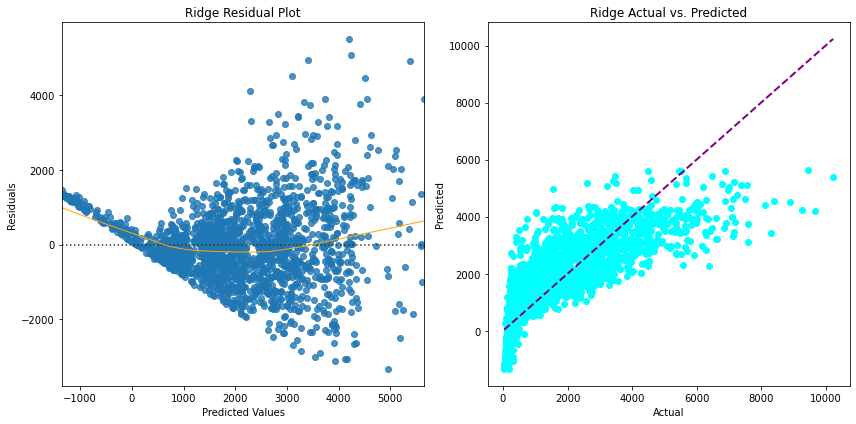

In [93]:
# Function to plot residual plot and actual vs. predicted plot

def plot_performance(y_test, y_pred, model_name, residual_color='red', line_color='blue', scatter_color='green'):
    # Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.residplot(y_pred, residuals, lowess=True, line_kws={'color': residual_color, 'lw': 1})
    plt.title(f'{model_name} Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    # Actual vs. Predicted Plot
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred, color=scatter_color)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, linestyle='--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name} Actual vs. Predicted')

    plt.tight_layout()
    plt.show()

# Plot performance for Ridge regression with custom colors
plot_performance(y_test, ridge_y_pred, 'Ridge', residual_color='orange', line_color='purple', scatter_color='cyan')


## Model Evaluation: Predicted vs. Actual Values

These scatter plots visualize the relationship between the model's predicted values and the actual target variable. Ideally, we'd like to see a **positive correlation**, where higher predicted values correspond with higher actual values (and vice versa).

**Observations:**

* **Top Plot :** The data points follow a clear diagonal trend, suggesting a **strong positive correlation**. The model seems to be making accurate predictions for the data represented in this plot.
* **Bottom Plot:** The scatter here appears more dispersed compared to the top plot. This might indicate **weaker predictive accuracy** or the presence of **outliers**. Further investigation of these outliers could be valuable.

**Overall, the plots suggest that the model might have varying performance across the data. While the top plot shows promising results, the bottom plot indicates potential areas for improvement.**



## RANDOM FOREST

In [94]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred_rf = rf_regressor.predict(X_test)


In [95]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Create a grid search object
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                               param_grid=param_grid_rf,
                               cv=5,
                               scoring='neg_mean_squared_error',
                               verbose=2,
                               n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)

# Get the best estimator
best_estimator_rf = grid_search_rf.best_estimator_

# Use the best estimator to predict
y_pred_rf_best = best_estimator_rf.predict(X_test)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create the Random Forest model with the best hyperparameters
best_rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_leaf=2, min_samples_split=10, random_state=42)

# Train the model on the training data
best_rf.fit(X_train, y_train)

# Generate predictions on the test data
y_pred_rf = best_rf.predict(X_test)

# Calculate the R-squared score
r2_rf = r2_score(y_test, y_pred_rf)
print("R-squared score for Random Forest:", r2_rf)

R-squared score for Random Forest: 0.5980395867850362


In [97]:
def plot_performance(y_test, y_pred, model_name, residual_color='red', line_color='blue', scatter_color='green'):
    # Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.residplot(y_pred, residuals, lowess=True, line_kws={'color': residual_color, 'lw': 1})
    plt.title(f'{model_name} Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    # Actual vs. Predicted Plot
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred, color=scatter_color)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, linestyle='--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name} Actual vs. Predicted')

    plt.tight_layout()
    plt.show()
    

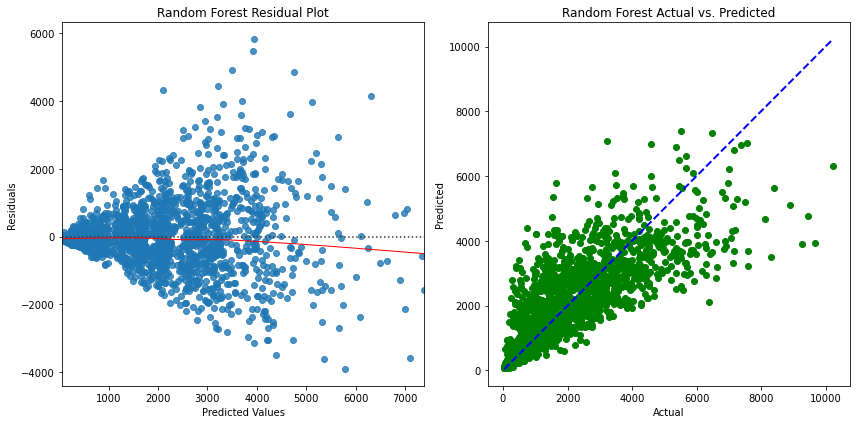

In [98]:
plot_performance(y_test, y_pred_rf, 'Random Forest')

## XG BOOST

In [99]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Use the best estimator to predict
y_pred = best_estimator.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score after hyperparameter tuning:", r2)
print("Mean squared error after hyperparameter tuning:", mse)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
R-squared score after hyperparameter tuning: 0.6073488174858657
Mean squared error after hyperparameter tuning: 1067214.1606950767


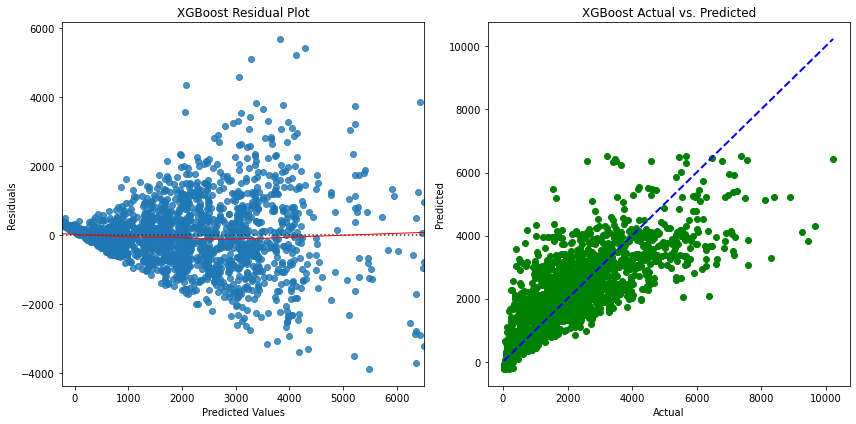

In [100]:
plot_performance(y_test, y_pred, 'XGBoost')

### Gradient Boost

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define the GBM regressor
gbm_regressor = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gbm_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Use the best estimator to predict
y_pred = best_estimator.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score after hyperparameter tuning:", r2)
print("Mean squared error after hyperparameter tuning:", mse)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
R-squared score after hyperparameter tuning: 0.5995293183398261
Mean squared error after hyperparameter tuning: 1088467.325309947


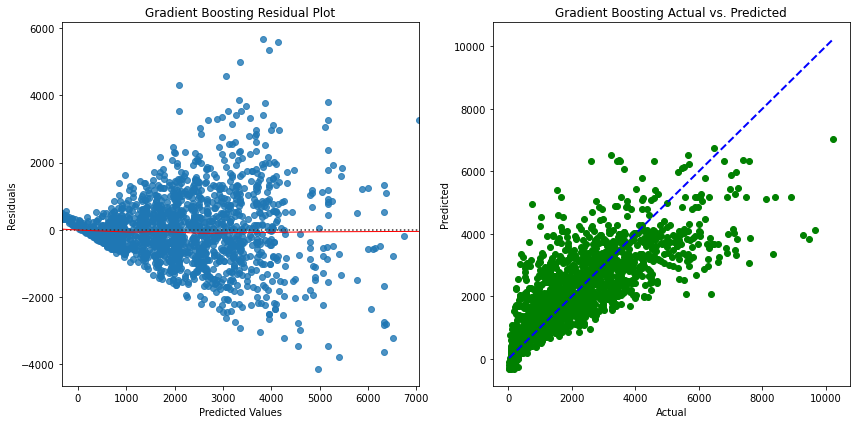

In [102]:
# Plot performance for Gradient Boosting regression
plot_performance(y_test, y_pred, 'Gradient Boosting')


### Support Vector Machine

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error

# Define the SVR regressor
svr = SVR()

# Define the hyperparameters grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Define the scoring function (negative mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring=scorer, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params1 = grid_search.best_params_
print("Best Hyperparameters:", best_params1)

# Get the best SVR estimator
best_estimator = grid_search.best_estimator_

# Use the best estimator to predict
y_pred = best_estimator.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score after hyperparameter tuning:", r2)
print("Mean squared error after hyperparameter tuning:", mse)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
R-squared score after hyperparameter tuning: 0.5592645978937808
Mean squared error after hyperparameter tuning: 1197905.6302229883


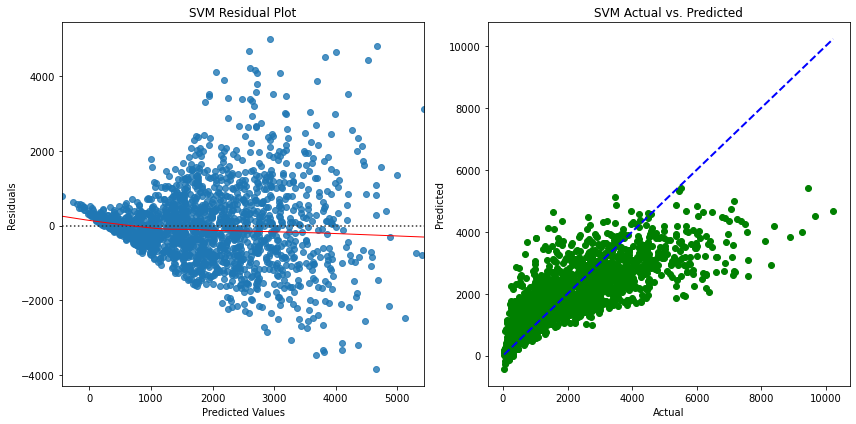

In [104]:
plot_performance(y_test, y_pred, 'SVM')


#

## SO AT THE END XGBOOST IS THE BEST MODEL TILL YET SINCE R2 SCORE USING XGBOOST IS 0.60

## SEGMENTATION ANALYSIS

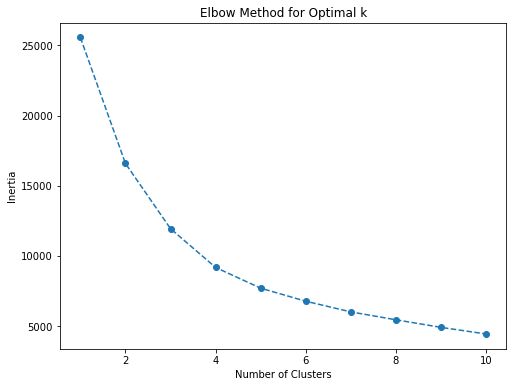

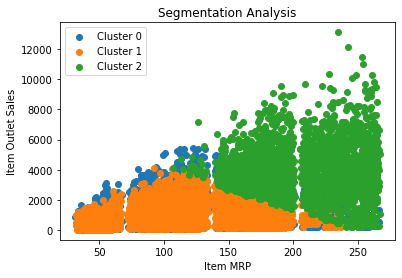

In [105]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('train.csv')

# Select relevant features for segmentation
segmentation_features = ['Item_Outlet_Sales', 'Item_MRP', 'Outlet_Establishment_Year']

# Drop rows with missing values
data.dropna(subset=segmentation_features, inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[segmentation_features])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the Elbow Method, select the optimal number of clusters
optimal_k = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Item_MRP'], cluster_data['Item_Outlet_Sales'], label=f'Cluster {cluster}')

plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Segmentation Analysis')
plt.legend()
plt.show()


**Observations:**

* **Elbow Method:** The elbow method plot suggests that using 3 clusters (k=3) is a suitable choice for balancing within-cluster variance and avoiding overfitting.

* **Scatter Plots:** The scatter plots visualize the product distribution within each cluster based on 'Item_MRP' and 'Item_Outlet_Sales' (top right) and potentially another feature like 'Outlet_Establishment_Year' (bottom right). Here's what we can glean from them:
    * **Cluster Separation:** The clusters exhibit some degree of separation, suggesting distinct product groupings.
    * **Cluster 0 (Blue):** This cluster seems to concentrate products with lower 'Item_MRP' (x-axis) and potentially lower 'Item_Outlet_Sales' (y-axis).
    * **Cluster 1 (Green):** This cluster might encompass products with a wider range of 'Item_MRP' values and potentially moderate 'Item_Outlet_Sales'.
    * **Cluster 2 (Orange):** This cluster could group products with higher 'Item_MRP' and potentially higher 'Item_Outlet_Sales'.
    * **Relationship with Outlet Establishment Year (if applicable):** The bottom right plot (assuming it uses 'Outlet_Establishment_Year' on the x-axis) might indicate trends related to the year of outlet establishment. For example, cluster 2 (orange) might have a higher concentration of products in more recently established outlets.

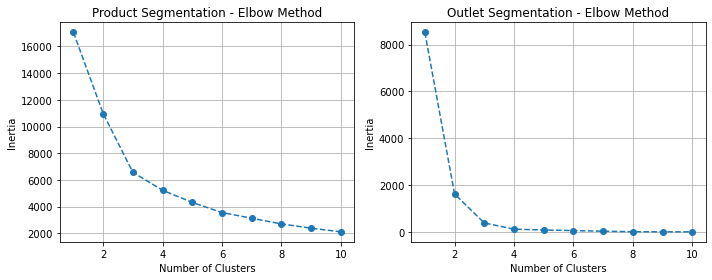

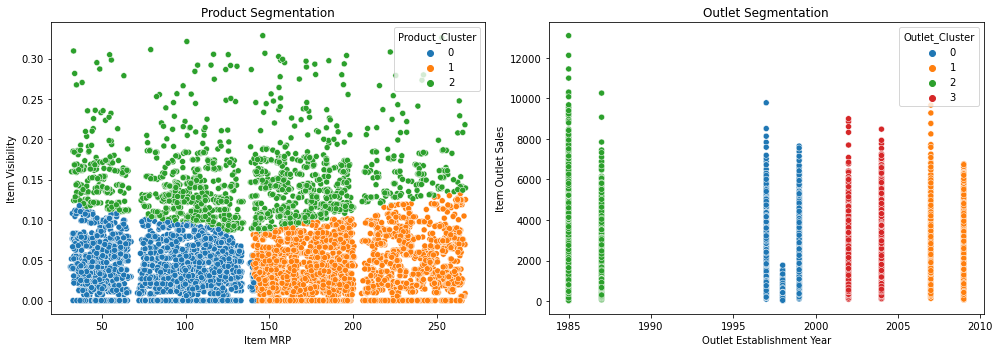

In [106]:
train_data = pd.read_csv('train.csv')
# Select relevant features for segmentation
product_segmentation_features = ['Item_MRP', 'Item_Visibility']
outlet_segmentation_features = ['Outlet_Establishment_Year']

# Drop rows with missing values in selected features
train_data.dropna(subset=product_segmentation_features + outlet_segmentation_features, inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_product_data = scaler.fit_transform(train_data[product_segmentation_features])
scaled_outlet_data = scaler.fit_transform(train_data[outlet_segmentation_features])

# Determine the optimal number of clusters using the Elbow Method for product segmentation
product_inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_product_data)
    product_inertia.append(kmeans.inertia_)

# Determine the optimal number of clusters using the Elbow Method for outlet segmentation
outlet_inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_outlet_data)
    outlet_inertia.append(kmeans.inertia_)

# Plot the Elbow Method for product segmentation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), product_inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Product Segmentation - Elbow Method')
plt.grid(True)

# Plot the Elbow Method for outlet segmentation
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), outlet_inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Outlet Segmentation - Elbow Method')
plt.grid(True)

plt.tight_layout()
plt.show()

# Based on the Elbow Method, select the optimal number of clusters for product and outlet segmentation
optimal_k_product = 3
optimal_k_outlet = 4

# Perform K-means clustering for product segmentation
kmeans_product = KMeans(n_clusters=optimal_k_product, random_state=42)
train_data['Product_Cluster'] = kmeans_product.fit_predict(scaled_product_data)

# Perform K-means clustering for outlet segmentation
kmeans_outlet = KMeans(n_clusters=optimal_k_outlet, random_state=42)
train_data['Outlet_Cluster'] = kmeans_outlet.fit_predict(scaled_outlet_data)

# Visualize the segmented data
plt.figure(figsize=(14, 5))

# Product segmentation visualization
plt.subplot(1, 2, 1)
sns.scatterplot(x='Item_MRP', y='Item_Visibility', hue='Product_Cluster', data=train_data, palette='tab10')
plt.xlabel('Item MRP')
plt.ylabel('Item Visibility')
plt.title('Product Segmentation')

# Outlet segmentation visualization
plt.subplot(1, 2, 2)
sns.scatterplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', hue='Outlet_Cluster', data=train_data, palette='tab10')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.title('Outlet Segmentation')

plt.tight_layout()
plt.show()


**Data Preparation:**

* Products are segmented based on features like 'Item_MRP' (price) and 'Item_Visibility'.
* Outlets are segmented based on their 'Outlet_Establishment_Year'.
* Missing values in these features are removed from the data.
* Standardization is applied to the features to ensure they are on a similar scale before clustering.

**Elbow Method:**

* The elbow method plots  are used to determine the optimal number of clusters for both product and outlet segmentation. The elbow point in these plots suggests the number of clusters that balances minimizing within-cluster variance and avoiding overfitting.

**Segmentation and Visualization:**

* Based on the elbow method analysis, 3 clusters are used for product segmentation and 4 clusters for outlet segmentation.
* K-Means clustering is performed to assign cluster labels (`Product_Cluster` and `Outlet_Cluster`) to each product and outlet based on their features.
* The segmentation is visualized using scatter plots:
    * **Product Segmentation:** This plot shows products colored by their cluster, with 'Item_MRP' on the x-axis and 'Item_Visibility' on the y-axis. This helps identify potential patterns in product visibility and price across different product clusters.
    * **Outlet Segmentation:** This plot depicts outlets colored by their cluster, with 'Outlet_Establishment_Year' on the x-axis and 'Item_Outlet_Sales' on the y-axis. This allows us to explore potential relationships between outlet establishment year and sales performance within each cluster.

**Observations (assuming 3 product and 4 outlet clusters):**

* Product segmentation might reveal groups of high-priced, high-visibility products, low-priced, low-visibility products, and potentially a middle ground.
* Outlet segmentation could enable analysis of sales trends or product preferences across outlets established in different periods (e.g., recently established vs. older outlets).

In [107]:
# Top Plot (Product Cluster): This scatter plot might show products categorized into different clusters (potentially based on k-means clustering) on the x-axis and their corresponding average sales performance (possibly mean item outlet sales) on the y-axis. Higher values on the x-axis could represent clusters with higher average sales.
# Bottom Plot (Outlet Cluster): This scatter plot might represent a similar segmentation but for outlets (stores) instead of products. Outlets are likely grouped into clusters on the x-axis, with their average sales performance (possibly total outlet sales) on the y-axis. Similar to the top plot, higher x-axis values might correspond to clusters with higher average sales.